In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv('../TWO_CENTURIES_ANALYSIS_CLEAN_WITH_PACE.csv')

## Muestreo aleatorio

Ya demostramos que se puede trabajar con este set de datos, pero no es viable seguir manteniendo un dataset de 6 Millones de datos, por lo que haremos un muestreo aleatorio con 3 semillas y verificaremos si los resultados son homogeneos.

In [17]:
variables = [
    'Distance_km',
    'Athlete age',
    'Time_hours',
    'Speed_calc_kmh'
]

# Semillas para reproducibilidad de las 3 muestras
semillas = [42, 95, 123]

# Resultados de las métricas
resultados = []

# Función para preparar datos (selección + escalamiento)
def preparar_datos(df_sample):
    df_sel = df_sample[variables].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_sel)
    df_sel.groupby('cluster')[
          ['Distance_km','Athlete age','Time_hours','Speed_calc_kmh']
        ].mean()
    return X_scaled, df_sel

# Función para aplicar KMeans y calcular métricas
def aplicar_kmeans(X, k=4):
    modelo = KMeans(n_clusters=k, random_state=0)
    etiquetas = modelo.fit_predict(X)
    sil = silhouette_score(X, etiquetas)
    calinski = calinski_harabasz_score(X, etiquetas)
    davies = davies_bouldin_score(X, etiquetas)
    return etiquetas, sil, calinski, davies

# Función para graficar los clusters con PCA
def graficar_clusters(X, etiquetas, titulo):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=etiquetas, palette='tab10', s=10)
    plt.title(titulo)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(title="Cluster", loc="best", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()# Aplicar KMeans a las tres muestras


Procesando muestra 1 con semilla 42...


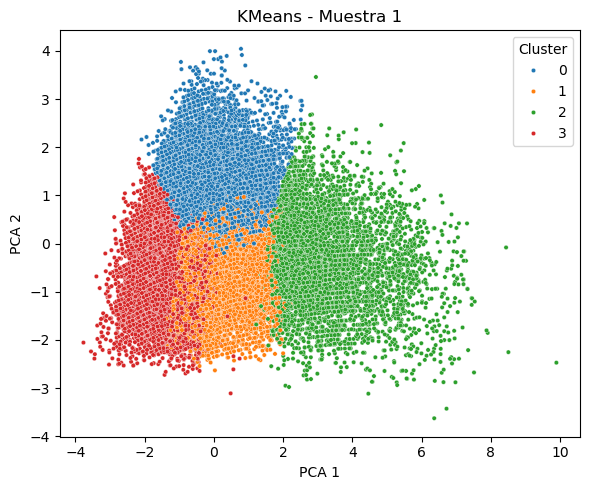

Procesando muestra 2 con semilla 95...


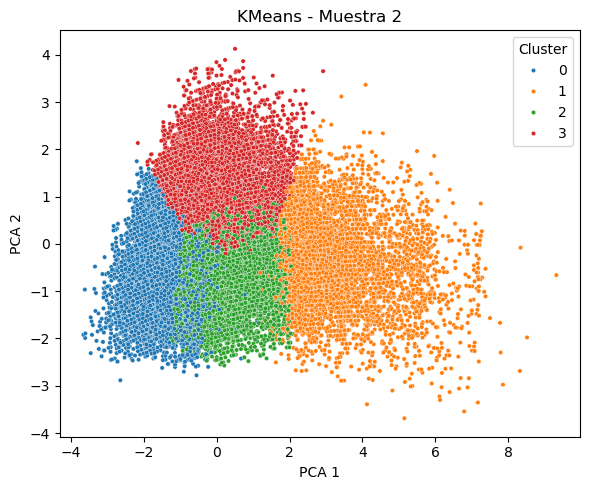

Procesando muestra 3 con semilla 123...


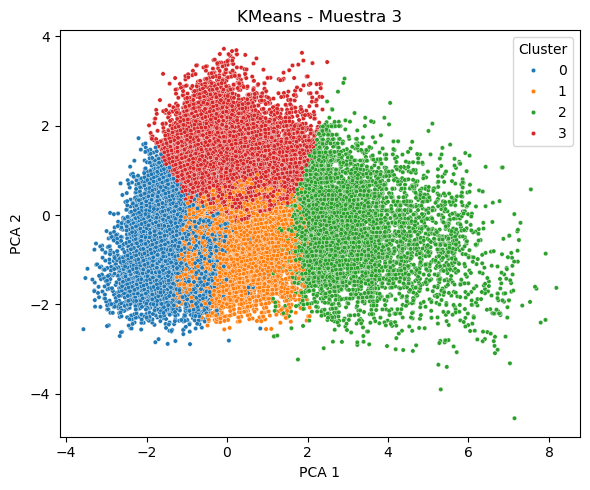

,Muestra,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,1,0.264350,23711.585213,1.132860
1,2,0.265551,23783.321342,1.133924
2,3,0.266298,23923.730330,1.130751


In [ ]:
for i, seed in enumerate(semillas):
    print(f"Procesando muestra {i+1} con semilla {seed}...")
    df_muestra = df.sample(n=50000, random_state=seed)
    X_scaled, df_sel = preparar_datos(df_muestra)
    etiquetas, sil, calinski, davies = aplicar_kmeans(X_scaled, k=4)
    resultados.append({
        'Muestra': i+1,
        'Silhouette': sil,
        'Calinski-Harabasz': calinski,
        'Davies-Bouldin': davies
    })
    graficar_clusters(X_scaled, etiquetas, f"KMeans - Muestra {i+1}")

# Mostrar resultados finales
print(pd.DataFrame(resultados))


In [23]:
df.groupby('cluster')[
  ['Distance_km','Athlete age','Time_hours','Speed_calc_kmh']
].mean()

KeyError: 'cluster'